In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [151]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 23})

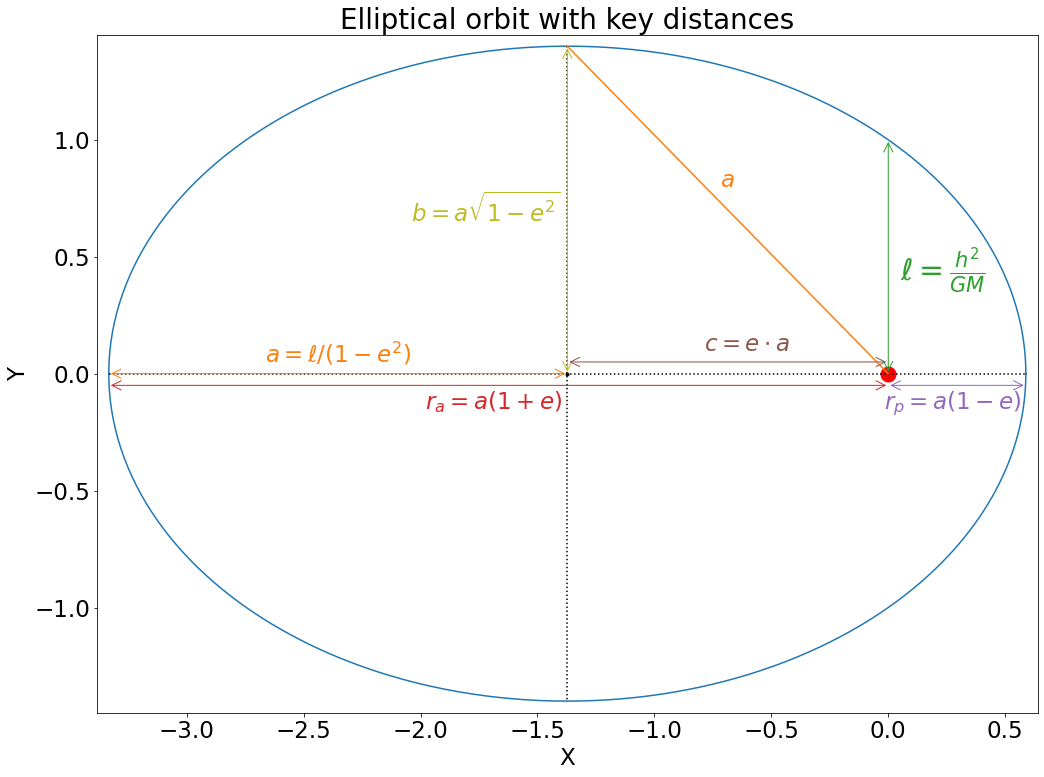

In [172]:

# Parameters
e = 0.7      # Eccentricity (0 < e < 1 for an ellipse)
GM = 1.0     # Gravitational constant times mass (arbitrary units)
h = 1.      # Specific angular momentum (arbitrary units)
phi_0 = 0    # Phase shift (radians)

# Compute constants
l = h**2 / GM                 # Semi-latus rectum, l = h^2 / GM
a = l / (1 - e**2)            # Semi-major axis, a = l / (1 - e^2)
b = a * np.sqrt(1 - e**2)     # Semi-minor axis, b = a * sqrt(1 - e^2)
c = e * a                     # Distance from center to focus

# True anomaly from 0 to 2π
phi = np.linspace(0, 2 * np.pi, 1000)

# Radius as a function of angle (polar equation)
r = l / (1 + e * np.cos(phi - phi_0))

# Convert polar to Cartesian coordinates
x = r * np.cos(phi)
y = r * np.sin(phi)

# Create the plot
plt.figure(figsize=(15, 12))

# Plot the ellipse
plt.plot(x, y, label='Orbit')

# Plot the focus (Sun) at (c, 0)
plt.plot(0, 0, 'ro', alpha=1, markersize=15, label='Focus (Sun)')

# Plot the center of the ellipse at (0, 0)
plt.plot(-c, 0, 'ko', markersize=3, label='Center')

# Axes
plt.plot((-c-a, -c+a), (0, 0), c='black', linestyle=':')
plt.plot((-c, -c), (b, -b), c='black', linestyle=':')

# Mark the semi-major axis 'a' with a two-headed arrow sitting on top of the line
plt.annotate('', xy=(-c-a, 0), xytext=(-c, 0), arrowprops=dict(arrowstyle='<->', color='tab:orange', lw=1, alpha=1))
# Add formula for a under the arrow
offset = +0.1
plt.text(-c-a/2, offset - 0.05, r'$a=\ell/(1 - e^2)$', color='tab:orange', ha='center')

# Show that this is also a
plt.plot((0, -c), (0, b), color='tab:orange')
offset = +0.1
plt.text(-c/2, b/2 + 0.1, r'$a$', color='tab:orange', ha='center')

# Mark the semi-minor axis 'b' with a two-headed arrow sitting on top of the line
plt.annotate('', xy=(-c, b), xytext=(-c, 0), arrowprops=dict(arrowstyle='<->', color='tab:olive'))

# Add formula for b under the arrow
offset = +0.1
plt.text(-c-0.35, b/2 - 0.05, r'$b=a\sqrt{1 - e^2}$', color='tab:olive', ha='center')

# Mark focus-centre
offset = +0.05
plt.annotate('', 
             xy=(-c, offset), 
             xytext=(0, offset), 
             arrowprops=dict(arrowstyle='<->', color='tab:brown', lw=1, alpha=1))
# Label 'c' with its formula beside the arrow
plt.text(-(c / 2 + 0.1), offset+0.05, r'$c = e \cdot a$', color='tab:brown', ha='left')


# Mark perihelion and aphelion distances
offset = -0.05  # Offset to position the arrows slightly below the x-axis
r_perihelion = a * (1 - e)   # Perihelion distance
r_aphelion = a * (1 + e)     # Aphelion distance

# Perihelion distance arrow
plt.annotate('', 
             xy=(r_perihelion, offset), 
             xytext=(0, offset), 
             arrowprops=dict(arrowstyle='<->', color='tab:purple', lw=1, alpha=1))
# Add formula for perihelion under the arrow
plt.text(r_perihelion / 2-0.02, offset - 0.1, r'$r_p = a(1 - e)$', color='tab:purple', ha='center')

# Aphelion distance arrow
plt.annotate('', 
             xy=(-r_aphelion, offset), 
             xytext=(0, offset), 
             arrowprops=dict(arrowstyle='<->', color='tab:red', lw=1, alpha=1))
# Add formula for aphelion under the arrow
plt.text(-r_aphelion / 2-0.02, offset - 0.1, r'$r_a = a(1 + e)$', color='tab:red', ha='center')

# Mark the semi-latus rectum 'l' with a two-headed arrow sitting on top of the line
phi_latus = np.pi / 2 + phi_0  # Angle where semi-latus rectum is measured
r_latus = l / (1 + e * np.cos(phi_latus - phi_0))
x_latus = r_latus * np.cos(phi_latus)
y_latus = r_latus * np.sin(phi_latus)

# Add the two-headed arrow for 'l'
plt.annotate('',
             xy=(0, 0), xycoords='data',
             xytext=(x_latus, y_latus), textcoords='data',
             arrowprops=dict(arrowstyle='<->', color='tab:green'))

# Label 'l' with its formula beside the semi-latus rectum arrow
plt.text(x_latus + 0.05, y_latus / 2 - 0.1, r'$\ell = \frac{h^2}{GM}$', color='tab:green', ha='left', fontsize=30)


# Set aspect ratio to equal for accurate representation
plt.gca().set_aspect('equal', adjustable='box')

# Set plot limits
buffer = 0.05
plt.xlim(-c-a - buffer, -c+a + buffer)
plt.ylim(-b - buffer, b + buffer)

# Labels and title
plt.title('Elliptical orbit with key distances')
plt.xlabel('X')
plt.ylabel('Y')

# Adjust the layout to prevent overlap and make the figure fit nicely
plt.tight_layout()

# Save the figure
plt.savefig("../Figures/kepler_ellipse_labelled.png", format="png", dpi=300, transparent=False, facecolor='white')

# Display the plot
plt.show()
